In [42]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans(X, k=5, epochs = 100):
    """
        Perform k means clustering
    """
    # randomly assign x of X to a class
    old_assignments = np.random.randint(0, k, size=X.shape[0])
    
    epoch = 0
    old_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        old_centroids[i] = np.mean(X[old_assignments == i], axis=0)
    
    while epoch < epochs:
        new_assignments = np.argmin(cdist(X, old_centroids), axis = 1)
        new_centroids = np.zeros((k, X.shape[1]))
        for i in range(k):
            new_centroids[i] = np.mean(X[new_assignments == i], axis=0)
        if np.sum(np.linalg.norm(old_centroids-new_centroids, axis=1))<1e-5:
            break
        else:
            old_centroids = new_centroids
            old_assignments = new_assignments

        epoch += 1

    return new_assignments, new_centroids

In [43]:
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

new_assignments, _ = kmeans(X, k=3, epochs=200)



[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

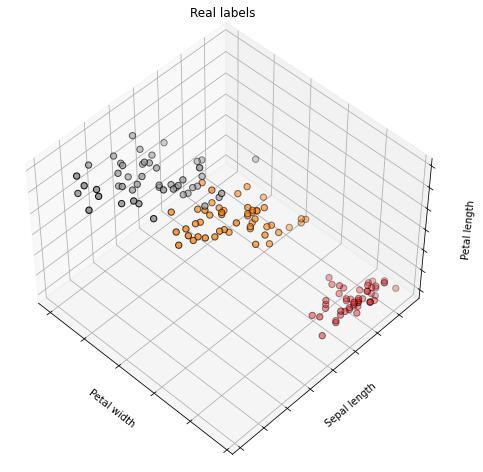

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Real labels")
ax.set_xlabel('Petal width')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Sepal length')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Petal length')
ax.w_zaxis.set_ticklabels([])

[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

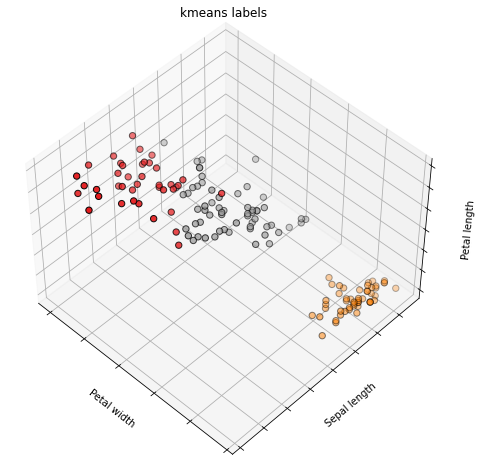

In [46]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=new_assignments,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("kmeans labels")
ax.set_xlabel('Petal width')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Sepal length')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Petal length')
ax.w_zaxis.set_ticklabels([])